In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# reading the train dataset to a panda dataframe
# the train dataset contains the price column and would be used for training the model
train = pd.read_csv('Housing_dataset_train.csv') 

train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [3]:
# reading the test dataset to a panda dataframe
# the test dataset contains all the features, but no price column(target). The trained model would be used to predict the prices
test = pd.read_csv('Housing_dataset_test.csv')

test

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [4]:
train['ind'] = 1
test['ind'] = 0

# Concatenate train and test DataFrames
df = pd.concat([train, test])

# Output the combined DataFrame
df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


### Data Cleaning

In [5]:
# calculate the median for the bdroom, bathroom and parking_space columns
median_bedroom = round(df['bedroom'].median(),0)
median_bathroom = round(df['bathroom'].median(),0)
median_parking_space = round(df['parking_space'].median(),0)

# Fill the missing values with the median of each column
df['bedroom'].fillna(median_bedroom, inplace=True)
df['bathroom'].fillna(median_bathroom, inplace=True)
df['parking_space'].fillna(median_parking_space, inplace=True)

In [6]:
# rename the loc column as location
df.rename(columns={'loc':'location'}, inplace = True)

In [7]:
# calculate the mode for the location and title columns
mode_location = df['location'].mode()[0]
mode_title = df['title'].mode()[0]

# Fill the missing values with the mode of each column
df['location'].fillna(mode_location, inplace=True)
df['title'].fillna(mode_title, inplace=True)

In [8]:
# check for missing values
df.isnull().sum()

ID                  0
location            0
title               0
bedroom             0
bathroom            0
parking_space       0
price            6000
ind                 0
dtype: int64

> The only null values are from the price column in the test dataframe which is to predicted using the trained model.

### Feature Engineering

In [9]:
# find the ratio of the bedrooms to the bathrooms
df['ratio_bed_bath'] = df['bedroom']/df['bathroom']

# summation of the number of bedrooms, bathrooms, and parking space
df['sum_bed_bath_park'] = df['bedroom'] + df['bathroom'] + df['parking_space']

In [10]:
# getting the population density for each state
population_density = {
    'Abia': 840,
    'Adamawa': 122.7,
    'Akwa Ibom': 726.0,
    'Anambra': 1264,
    'Bauchi': 273.9,
    'Bayelsa': 270.2,
    'Benue': 145.1,
    'Borno': 84.70,
    'Cross River': 209.6,
    'Delta': 331.8,
    'Ebonyi': 499.8,
    'Edo': 244.2,
    'Ekiti': 621.3,
    'Enugu': 1300,
    'Gombe': 238.0,
    'Imo': 1063,
    'Jigawa': 319.9,
    'Kaduna': 200.4,
    'Kano': 764.3,
    'Katsina': 427.8,
    'Kebbi': 149.6,
    'Kogi': 154.1,
    'Kwara': 106.2,
    'Lagos': 3791,
    'Nasarawa': 109.9,
    'Niger': 95.60,
    'Ogun': 382.8,
    'Ondo': 353.3,
    'Osun': 520.6,
    'Oyo': 288.5,
    'Plateau': 181.3,
    'Rivers': 773.3,
    'Sokoto': 205.9,
    'Taraba': 61.40,
    'Yobe': 79.77,
    'Zamfara': 170.2
}

# convert the population densities to a list
population_densities = list(population_density.values())

# Calculate percentiles
percentiles = [0, 20, 40, 60, 100]
population_percentiles = [np.percentile(population_densities, p) for p in percentiles]

# Categorize states based on percentiles
class_1 = [state for state, density in population_density.items() if density > population_percentiles[4]]
class_2 = [state for state, density in population_density.items() if density > population_percentiles[3] and density <= population_percentiles[4]]
class_3 = [state for state, density in population_density.items() if density > population_percentiles[2] and density <= population_percentiles[3]]
class_4 = [state for state, density in population_density.items() if density > population_percentiles[1] and density <= population_percentiles[2]]
class_5 = [state for state, density in population_density.items() if density <= population_percentiles[1]]

# Print the states in each population density class
print('Class 1:', class_1)
print('Class 2:', class_2)
print('Class 3:', class_3)
print('Class 4:', class_4)
print('Class 5:', class_5)

Class 1: []
Class 2: ['Abia', 'Akwa Ibom', 'Anambra', 'Ebonyi', 'Ekiti', 'Enugu', 'Imo', 'Kano', 'Katsina', 'Lagos', 'Ogun', 'Ondo', 'Osun', 'Rivers']
Class 3: ['Bauchi', 'Bayelsa', 'Delta', 'Edo', 'Gombe', 'Jigawa', 'Oyo']
Class 4: ['Cross River', 'Kaduna', 'Kebbi', 'Kogi', 'Plateau', 'Sokoto', 'Zamfara']
Class 5: ['Adamawa', 'Benue', 'Borno', 'Kwara', 'Nasarawa', 'Niger', 'Taraba', 'Yobe']


In [11]:
df['population_density_level'] = df['location'].apply(lambda x: 5 if x in class_1
                                                     else 4 if x in class_2
                                                     else 3 if x in class_3
                                                     else 2 if x in class_4
                                                     else 1 if x in class_5
                                                     else 0)

In [12]:
# create a list of the states in each population density level
population_level_1 = ['Anambra', 'Enugu', 'Imo', 'Lagos']
population_level_2 = ['Abia', 'Kano', 'Rivers']
population_level_3 = ['Akwa Ibom', 'Ebonyi', 'Ekiti', 'Osun']
population_level_4 = ['Katsina', 'Ogun', 'Ondo']
population_level_5 = ['Bauchi', 'Delta', 'Jigawa', 'Oyo']
population_level_6 = ['Bayelsa', 'Edo', 'Gombe']
population_level_7 = ['Cross River', 'Kaduna', 'Plateau', 'Sokoto']
population_level_8 = ['Kebbi', 'Kogi', 'Zamfara']
population_level_9 = ['Adamawa', 'Benue', 'Kwara', 'Nasarawa']
population_level_10 = ['Borno', 'Niger', 'Taraba', 'Yobe']

df['population_density_level'] = df['location'].apply(lambda x: 10 if x in population_level_1
                                                                    else 9 if x in population_level_2
                                                                    else 8 if x in population_level_3
                                                                    else 7 if x in population_level_4
                                                                    else 6 if x in population_level_5
                                                                    else 5 if x in population_level_6
                                                                    else 4 if x in population_level_7
                                                                    else 3 if x in population_level_8
                                                                    else 2 if x in population_level_9
                                                                    else 1 if x in population_level_10
                                                                    else 0)


  
df

,ID,location,title,bedroom,bathroom,parking_space,price,ind,ratio_bed_bath,sum_bed_bath_park,population_density_level
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,7
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,7
2,9261,Ekiti,Flat,7.0,5.0,3.0,3364799.814,1,1.400000,15.0,8
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,10
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,3
...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0,0.800000,11.0,8
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0,0.714286,13.0,2
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0,4.000000,9.0,6
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0,0.428571,15.0,6


In [13]:
import category_encoders as ce

# Create a new DataFrame to store the encoded values
encoded_df = df.copy()

# Define the encoder instance
encoder = ce.TargetEncoder(cols=['location'])

# Fit the encoder on the 'location' column and 'price' target variable
encoder.fit(encoded_df['location'], encoded_df['price'])

# Transform the 'location' column with the encoded values
encoded_df['location_encoded'] = encoder.transform(encoded_df['location'])

# Drop the original 'location' column
encoded_df.drop('location', axis=1, inplace=True)

# Print the updated DataFrame with the encoded 'location' column
encoded_df

,ID,title,bedroom,bathroom,parking_space,price,ind,ratio_bed_bath,sum_bed_bath_park,population_density_level,location_encoded
0,3583,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,7,1.947589e+06
1,2748,Apartment,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,7,2.277494e+06
2,9261,Flat,7.0,5.0,3.0,3364799.814,1,1.400000,15.0,8,2.109220e+06
3,2224,Detached duplex,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,10,2.198073e+06
4,10300,Terrace duplex,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,3,1.763416e+06
...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,Flat,4.0,5.0,2.0,NaN,0,0.800000,11.0,8,2.109220e+06
5996,2416,Terrace duplex,5.0,7.0,1.0,NaN,0,0.714286,13.0,2,1.905287e+06
5997,10195,Townhouse,4.0,1.0,4.0,NaN,0,4.000000,9.0,6,2.293159e+06
5998,9455,Flat,3.0,7.0,5.0,NaN,0,0.428571,15.0,6,1.772961e+06


In [14]:
# Define the encoder instance
encoder = ce.TargetEncoder(cols=['title'])

# Fit the encoder on the 'loc' column and 'price' target variable
encoder.fit(encoded_df['title'], encoded_df['price'])

# Transform the 'loc' column with the encoded values
encoded_df['title_encoded'] = encoder.transform(encoded_df['title'])

# Drop the original 'title' column 
encoded_df.drop('title', axis=1, inplace=True)

# Print the updated DataFrame with the encoded 'loc' column
encoded_df

,ID,bedroom,bathroom,parking_space,price,ind,ratio_bed_bath,sum_bed_bath_park,population_density_level,location_encoded,title_encoded
0,3583,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,7,1.947589e+06,1.918468e+06
1,2748,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,7,2.277494e+06,1.567004e+06
2,9261,7.0,5.0,3.0,3364799.814,1,1.400000,15.0,8,2.109220e+06,1.972723e+06
3,2224,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,10,2.198073e+06,2.205883e+06
4,10300,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,3,1.763416e+06,1.927270e+06
...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,4.0,5.0,2.0,NaN,0,0.800000,11.0,8,2.109220e+06,1.972723e+06
5996,2416,5.0,7.0,1.0,NaN,0,0.714286,13.0,2,1.905287e+06,1.927270e+06
5997,10195,4.0,1.0,4.0,NaN,0,4.000000,9.0,6,2.293159e+06,2.056125e+06
5998,9455,3.0,7.0,5.0,NaN,0,0.428571,15.0,6,1.772961e+06,1.972723e+06


### Data Modelling

In [15]:
# splitting the encoded_df into the train and test dataframes. The train dataframe is to be used for training the model
train = encoded_df[encoded_df.ind == 1]
test = encoded_df[encoded_df.ind == 0]

In [16]:
# create the features 
features_df = train.drop(columns = ['ID','ind','price'])

# create the target
target_df = train['price']

In [17]:
# splitting the training dataset using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state = 1)

In [18]:
# import the necessary machine learning models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [19]:
# putting the models in a dictionary
models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(),
          'XGBoost Regressor': XGBRegressor(),
          'Ridge': Ridge(),
          'Cat Boost Regressor': CatBoostRegressor(),
          'Support Vector Regressor': SVR()}

# Setting up a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(10)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        model_scores[name] = rmse
    return model_scores

In [20]:
%%time

scores = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
scores

Learning rate set to 0.058721
0:	learn: 1032831.5008984	total: 152ms	remaining: 2m 31s
1:	learn: 995937.6569377	total: 164ms	remaining: 1m 21s
2:	learn: 964810.5336921	total: 173ms	remaining: 57.6s
3:	learn: 932525.9016355	total: 190ms	remaining: 47.4s
4:	learn: 904252.9080383	total: 198ms	remaining: 39.3s
5:	learn: 876292.1390563	total: 204ms	remaining: 33.9s
6:	learn: 851225.5354730	total: 211ms	remaining: 29.9s
7:	learn: 829122.2799222	total: 217ms	remaining: 26.9s
8:	learn: 808243.1241719	total: 221ms	remaining: 24.4s
9:	learn: 787602.6690575	total: 226ms	remaining: 22.3s
10:	learn: 768209.6571233	total: 229ms	remaining: 20.6s
11:	learn: 749777.5527385	total: 233ms	remaining: 19.2s
12:	learn: 732351.9011525	total: 237ms	remaining: 18s
13:	learn: 717317.2866868	total: 240ms	remaining: 16.9s
14:	learn: 702511.6584971	total: 244ms	remaining: 16s
15:	learn: 688720.0404382	total: 248ms	remaining: 15.2s
16:	learn: 676655.2339259	total: 251ms	remaining: 14.5s
17:	learn: 664768.7070223	tot

183:	learn: 483523.3720785	total: 889ms	remaining: 3.94s
184:	learn: 483268.9976469	total: 894ms	remaining: 3.94s
185:	learn: 483154.6910604	total: 898ms	remaining: 3.93s
186:	learn: 482975.2254522	total: 903ms	remaining: 3.93s
187:	learn: 482783.4292432	total: 913ms	remaining: 3.94s
188:	learn: 482680.8568782	total: 930ms	remaining: 3.99s
189:	learn: 482598.0067397	total: 936ms	remaining: 3.99s
190:	learn: 482445.4801702	total: 942ms	remaining: 3.99s
191:	learn: 482141.9227118	total: 947ms	remaining: 3.99s
192:	learn: 481944.4222595	total: 953ms	remaining: 3.98s
193:	learn: 481712.5112607	total: 959ms	remaining: 3.98s
194:	learn: 481566.5100837	total: 963ms	remaining: 3.97s
195:	learn: 481519.8442240	total: 968ms	remaining: 3.97s
196:	learn: 481438.6802350	total: 972ms	remaining: 3.96s
197:	learn: 481327.3949788	total: 977ms	remaining: 3.96s
198:	learn: 481219.0537305	total: 981ms	remaining: 3.95s
199:	learn: 481162.4580906	total: 986ms	remaining: 3.94s
200:	learn: 481036.5766811	tota

358:	learn: 460415.9044745	total: 1.59s	remaining: 2.84s
359:	learn: 460352.7196345	total: 1.59s	remaining: 2.83s
360:	learn: 460227.4808261	total: 1.6s	remaining: 2.83s
361:	learn: 460179.3509350	total: 1.6s	remaining: 2.82s
362:	learn: 460093.6818441	total: 1.6s	remaining: 2.82s
363:	learn: 460008.7571194	total: 1.61s	remaining: 2.81s
364:	learn: 459755.0584000	total: 1.61s	remaining: 2.81s
365:	learn: 459726.9936650	total: 1.62s	remaining: 2.8s
366:	learn: 459602.1102796	total: 1.62s	remaining: 2.8s
367:	learn: 459482.9443169	total: 1.63s	remaining: 2.8s
368:	learn: 459450.0277533	total: 1.64s	remaining: 2.8s
369:	learn: 459342.5989169	total: 1.64s	remaining: 2.79s
370:	learn: 459258.8969367	total: 1.64s	remaining: 2.79s
371:	learn: 459093.5556549	total: 1.65s	remaining: 2.78s
372:	learn: 458889.7180905	total: 1.65s	remaining: 2.78s
373:	learn: 458823.2565806	total: 1.66s	remaining: 2.77s
374:	learn: 458747.9813390	total: 1.66s	remaining: 2.77s
375:	learn: 458698.8286191	total: 1.66

510:	learn: 446981.5591462	total: 2.28s	remaining: 2.18s
511:	learn: 446903.2578439	total: 2.28s	remaining: 2.17s
512:	learn: 446763.4059050	total: 2.29s	remaining: 2.17s
513:	learn: 446650.5563195	total: 2.29s	remaining: 2.17s
514:	learn: 446500.7931608	total: 2.29s	remaining: 2.16s
515:	learn: 446441.7724041	total: 2.3s	remaining: 2.16s
516:	learn: 446390.5550098	total: 2.3s	remaining: 2.15s
517:	learn: 446313.7336358	total: 2.31s	remaining: 2.15s
518:	learn: 446225.9177253	total: 2.31s	remaining: 2.14s
519:	learn: 446157.9004142	total: 2.32s	remaining: 2.14s
520:	learn: 446038.4064520	total: 2.32s	remaining: 2.13s
521:	learn: 445957.6809565	total: 2.32s	remaining: 2.13s
522:	learn: 445868.5370050	total: 2.33s	remaining: 2.12s
523:	learn: 445562.6202980	total: 2.33s	remaining: 2.12s
524:	learn: 445513.6114802	total: 2.34s	remaining: 2.12s
525:	learn: 445408.3271119	total: 2.34s	remaining: 2.11s
526:	learn: 445374.1220047	total: 2.35s	remaining: 2.11s
527:	learn: 445308.9014370	total:

657:	learn: 435758.1193027	total: 2.97s	remaining: 1.54s
658:	learn: 435703.3326779	total: 2.98s	remaining: 1.54s
659:	learn: 435663.6257982	total: 2.98s	remaining: 1.53s
660:	learn: 435611.7303799	total: 2.98s	remaining: 1.53s
661:	learn: 435496.2592463	total: 2.99s	remaining: 1.53s
662:	learn: 435461.2634478	total: 2.99s	remaining: 1.52s
663:	learn: 435358.0601503	total: 3s	remaining: 1.52s
664:	learn: 435315.7220578	total: 3s	remaining: 1.51s
665:	learn: 435261.3084572	total: 3.01s	remaining: 1.51s
666:	learn: 435129.5671465	total: 3.01s	remaining: 1.5s
667:	learn: 435059.8862235	total: 3.01s	remaining: 1.5s
668:	learn: 434979.1586813	total: 3.02s	remaining: 1.49s
669:	learn: 434931.3433900	total: 3.02s	remaining: 1.49s
670:	learn: 434867.1619371	total: 3.02s	remaining: 1.48s
671:	learn: 434822.1787142	total: 3.03s	remaining: 1.48s
672:	learn: 434784.9423385	total: 3.03s	remaining: 1.47s
673:	learn: 434746.2432512	total: 3.04s	remaining: 1.47s
674:	learn: 434688.2990180	total: 3.04s

820:	learn: 424192.8060789	total: 3.67s	remaining: 801ms
821:	learn: 424157.6173045	total: 3.69s	remaining: 800ms
822:	learn: 424073.4929116	total: 3.7s	remaining: 795ms
823:	learn: 424025.4043647	total: 3.7s	remaining: 791ms
824:	learn: 423981.9471211	total: 3.71s	remaining: 786ms
825:	learn: 423930.9547182	total: 3.71s	remaining: 781ms
826:	learn: 423857.8071496	total: 3.71s	remaining: 777ms
827:	learn: 423766.6358787	total: 3.72s	remaining: 772ms
828:	learn: 423667.0816491	total: 3.72s	remaining: 767ms
829:	learn: 423618.9388959	total: 3.72s	remaining: 763ms
830:	learn: 423563.8031336	total: 3.73s	remaining: 758ms
831:	learn: 423525.0269122	total: 3.73s	remaining: 753ms
832:	learn: 423460.7576941	total: 3.73s	remaining: 749ms
833:	learn: 423391.1338497	total: 3.74s	remaining: 744ms
834:	learn: 423362.1728734	total: 3.74s	remaining: 740ms
835:	learn: 423314.3050920	total: 3.75s	remaining: 735ms
836:	learn: 423259.1845714	total: 3.75s	remaining: 730ms
837:	learn: 423191.1918250	total:

978:	learn: 415653.0096175	total: 4.37s	remaining: 93.7ms
979:	learn: 415614.9121308	total: 4.37s	remaining: 89.2ms
980:	learn: 415551.6189798	total: 4.38s	remaining: 84.8ms
981:	learn: 415515.8097809	total: 4.38s	remaining: 80.3ms
982:	learn: 415490.1920305	total: 4.38s	remaining: 75.8ms
983:	learn: 415439.0326680	total: 4.39s	remaining: 71.4ms
984:	learn: 415395.1241124	total: 4.39s	remaining: 66.9ms
985:	learn: 415338.4092482	total: 4.4s	remaining: 62.5ms
986:	learn: 415303.9699489	total: 4.4s	remaining: 58ms
987:	learn: 415256.5511525	total: 4.41s	remaining: 53.5ms
988:	learn: 415233.8611986	total: 4.41s	remaining: 49.1ms
989:	learn: 415224.8222812	total: 4.42s	remaining: 44.6ms
990:	learn: 415166.9896058	total: 4.42s	remaining: 40.1ms
991:	learn: 415050.6499200	total: 4.42s	remaining: 35.7ms
992:	learn: 414999.8003108	total: 4.43s	remaining: 31.2ms
993:	learn: 414883.0593487	total: 4.43s	remaining: 26.8ms
994:	learn: 414836.5144580	total: 4.44s	remaining: 22.3ms
995:	learn: 414810

{'Linear Regression': 613042.71449259,
 'Random Forest': 603685.9805392368,
 'XGBoost Regressor': 598444.8826579332,
 'Ridge': 613042.5114360001,
 'Cat Boost Regressor': 561080.4833438796,
 'Support Vector Regressor': 1138894.5669237454}

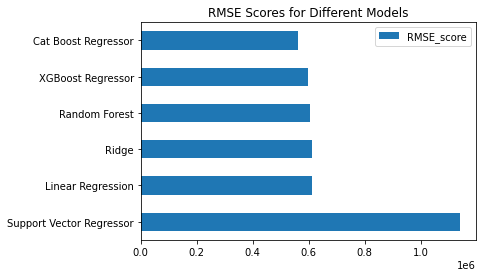

In [21]:
model_compare = pd.DataFrame(scores, index = ['RMSE_score'])

# Transpose the DataFrame and sort it in ascending order based on RMSE_score
model_compare_sorted = model_compare.T.sort_values(by='RMSE_score', ascending=False)

model_compare_sorted.plot.barh()
plt.title('RMSE Scores for Different Models');

> Since we are looking for the model with the least Rmse score, the Catboost regressor, XGBoost regressor and the Random Forest are the three best models with rmse of 561080.48, 598444.88 and 603685.98 respectively.

In [22]:
# performing a k-fold cross validation on the models to improve the mdoels' performance
from sklearn.model_selection import KFold

def kfold_cross_validation(model, features_df, target_df, num_folds=5):
    np.random.seed(20)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    kf.split(features_df)
    
    # Store the cross-validation scores
    cv_scores = []

    # Split the data into k folds and perform cross-validation
    for train_index, test_index in kf.split(features_df):
        X_train, X_test = features_df.iloc[train_index], features_df.iloc[test_index]
        y_train, y_test = target_df[train_index], target_df[test_index]

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate the RMSE for the current fold and store it in cv_scores
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        cv_scores.append(rmse)

    return cv_scores

In [23]:
# Apply k-fold cross-validation and get mean RMSE scores for each model
cv_scores = {}
for name, model in models.items():
    scores = kfold_cross_validation(model, features_df, target_df, num_folds=5)
    cv_scores[name] = np.mean(scores)

# Display the mean RMSE scores for each model
for name, score in cv_scores.items():
    print(f"{name}: Mean RMSE = {score}")

Learning rate set to 0.059973
0:	learn: 1033212.4415932	total: 5.08ms	remaining: 5.08s
1:	learn: 995081.5116514	total: 9.86ms	remaining: 4.92s
2:	learn: 963539.3434885	total: 14.7ms	remaining: 4.88s
3:	learn: 931291.9443269	total: 19.4ms	remaining: 4.83s
4:	learn: 902079.4868611	total: 24.1ms	remaining: 4.79s
5:	learn: 873611.2775036	total: 28.9ms	remaining: 4.79s
6:	learn: 847968.9526225	total: 34.2ms	remaining: 4.85s
7:	learn: 824198.1390045	total: 38.9ms	remaining: 4.83s
8:	learn: 802879.7087119	total: 43.5ms	remaining: 4.79s
9:	learn: 781821.6988128	total: 48.4ms	remaining: 4.79s
10:	learn: 762345.6819217	total: 53.1ms	remaining: 4.77s
11:	learn: 744477.2797101	total: 57.6ms	remaining: 4.74s
12:	learn: 726753.0390585	total: 62.3ms	remaining: 4.73s
13:	learn: 711265.5514814	total: 67.1ms	remaining: 4.72s
14:	learn: 696973.4347192	total: 71.8ms	remaining: 4.72s
15:	learn: 682919.6980427	total: 76.3ms	remaining: 4.69s
16:	learn: 671156.4292314	total: 80.7ms	remaining: 4.67s
17:	learn:

146:	learn: 491690.6831172	total: 700ms	remaining: 4.06s
147:	learn: 491541.0094286	total: 707ms	remaining: 4.07s
148:	learn: 491354.0140105	total: 712ms	remaining: 4.07s
149:	learn: 491286.0039010	total: 717ms	remaining: 4.06s
150:	learn: 490814.3455453	total: 721ms	remaining: 4.05s
151:	learn: 490736.8130994	total: 726ms	remaining: 4.05s
152:	learn: 490665.3115686	total: 730ms	remaining: 4.04s
153:	learn: 490528.0583614	total: 735ms	remaining: 4.04s
154:	learn: 490104.9603782	total: 739ms	remaining: 4.03s
155:	learn: 489995.5839182	total: 743ms	remaining: 4.02s
156:	learn: 489744.7009011	total: 748ms	remaining: 4.01s
157:	learn: 489511.3131897	total: 752ms	remaining: 4.01s
158:	learn: 489080.5811040	total: 757ms	remaining: 4s
159:	learn: 488683.6839231	total: 761ms	remaining: 4s
160:	learn: 488432.5422780	total: 766ms	remaining: 3.99s
161:	learn: 488292.9075476	total: 770ms	remaining: 3.98s
162:	learn: 488173.2506535	total: 775ms	remaining: 3.98s
163:	learn: 487992.5794965	total: 779

325:	learn: 466215.7404111	total: 1.56s	remaining: 3.23s
326:	learn: 466092.9436301	total: 1.57s	remaining: 3.23s
327:	learn: 466061.6258775	total: 1.57s	remaining: 3.22s
328:	learn: 465871.7471128	total: 1.58s	remaining: 3.22s
329:	learn: 465781.4327250	total: 1.58s	remaining: 3.21s
330:	learn: 465446.5865009	total: 1.59s	remaining: 3.21s
331:	learn: 465386.6062640	total: 1.59s	remaining: 3.2s
332:	learn: 465140.1267468	total: 1.59s	remaining: 3.19s
333:	learn: 465102.6377056	total: 1.6s	remaining: 3.19s
334:	learn: 465044.3538785	total: 1.6s	remaining: 3.18s
335:	learn: 464945.5004033	total: 1.61s	remaining: 3.18s
336:	learn: 464898.2641917	total: 1.61s	remaining: 3.17s
337:	learn: 464684.9531752	total: 1.62s	remaining: 3.17s
338:	learn: 464656.3328392	total: 1.62s	remaining: 3.16s
339:	learn: 464623.0815215	total: 1.63s	remaining: 3.16s
340:	learn: 464580.6574551	total: 1.63s	remaining: 3.15s
341:	learn: 464535.3709582	total: 1.63s	remaining: 3.15s
342:	learn: 464426.3661834	total: 

474:	learn: 450939.4938734	total: 2.26s	remaining: 2.5s
475:	learn: 450870.6454248	total: 2.27s	remaining: 2.5s
476:	learn: 450812.0820596	total: 2.27s	remaining: 2.49s
477:	learn: 450608.9982579	total: 2.28s	remaining: 2.49s
478:	learn: 450565.5923386	total: 2.28s	remaining: 2.48s
479:	learn: 450440.0221003	total: 2.29s	remaining: 2.48s
480:	learn: 450386.8809173	total: 2.29s	remaining: 2.47s
481:	learn: 450311.9061050	total: 2.29s	remaining: 2.47s
482:	learn: 450189.3096469	total: 2.3s	remaining: 2.46s
483:	learn: 450100.0334761	total: 2.3s	remaining: 2.46s
484:	learn: 450053.9687987	total: 2.31s	remaining: 2.45s
485:	learn: 450023.7190879	total: 2.31s	remaining: 2.45s
486:	learn: 449985.9053097	total: 2.32s	remaining: 2.44s
487:	learn: 449928.7025556	total: 2.32s	remaining: 2.44s
488:	learn: 449893.3487587	total: 2.33s	remaining: 2.43s
489:	learn: 449832.9765325	total: 2.33s	remaining: 2.43s
490:	learn: 449720.0188168	total: 2.33s	remaining: 2.42s
491:	learn: 449567.7491592	total: 2

626:	learn: 439184.5785069	total: 2.96s	remaining: 1.76s
627:	learn: 439150.5248953	total: 2.96s	remaining: 1.75s
628:	learn: 439125.2866422	total: 2.97s	remaining: 1.75s
629:	learn: 439097.0547345	total: 2.97s	remaining: 1.75s
630:	learn: 439079.9673523	total: 2.98s	remaining: 1.74s
631:	learn: 439007.9385138	total: 2.98s	remaining: 1.74s
632:	learn: 438970.5910220	total: 2.98s	remaining: 1.73s
633:	learn: 438917.4749986	total: 2.99s	remaining: 1.73s
634:	learn: 438901.1455005	total: 2.99s	remaining: 1.72s
635:	learn: 438830.5221912	total: 3s	remaining: 1.72s
636:	learn: 438745.3046319	total: 3s	remaining: 1.71s
637:	learn: 438704.8836460	total: 3.01s	remaining: 1.71s
638:	learn: 438623.1724308	total: 3.01s	remaining: 1.7s
639:	learn: 438517.8564192	total: 3.02s	remaining: 1.7s
640:	learn: 438424.4077613	total: 3.02s	remaining: 1.69s
641:	learn: 438384.7644474	total: 3.02s	remaining: 1.69s
642:	learn: 438359.0700835	total: 3.03s	remaining: 1.68s
643:	learn: 438244.4238099	total: 3.04s

778:	learn: 430676.4814306	total: 3.67s	remaining: 1.04s
779:	learn: 430596.2231612	total: 3.67s	remaining: 1.04s
780:	learn: 430566.9372533	total: 3.68s	remaining: 1.03s
781:	learn: 430512.3944330	total: 3.68s	remaining: 1.03s
782:	learn: 430475.0736530	total: 3.69s	remaining: 1.02s
783:	learn: 430425.6488687	total: 3.69s	remaining: 1.02s
784:	learn: 430367.8473272	total: 3.7s	remaining: 1.01s
785:	learn: 430313.7918632	total: 3.7s	remaining: 1.01s
786:	learn: 430242.3725628	total: 3.71s	remaining: 1s
787:	learn: 430225.4561707	total: 3.71s	remaining: 998ms
788:	learn: 430160.0723238	total: 3.71s	remaining: 993ms
789:	learn: 430106.8554918	total: 3.72s	remaining: 989ms
790:	learn: 430047.3550946	total: 3.72s	remaining: 984ms
791:	learn: 429975.6665084	total: 3.73s	remaining: 979ms
792:	learn: 429940.9883219	total: 3.73s	remaining: 974ms
793:	learn: 429883.4178497	total: 3.74s	remaining: 969ms
794:	learn: 429831.1353272	total: 3.74s	remaining: 965ms
795:	learn: 429752.7618597	total: 3.

953:	learn: 422127.0686358	total: 4.58s	remaining: 221ms
954:	learn: 422027.2834713	total: 4.58s	remaining: 216ms
955:	learn: 421957.1526159	total: 4.59s	remaining: 211ms
956:	learn: 421905.7930111	total: 4.59s	remaining: 206ms
957:	learn: 421798.3755010	total: 4.6s	remaining: 202ms
958:	learn: 421752.1708361	total: 4.6s	remaining: 197ms
959:	learn: 421710.1119123	total: 4.61s	remaining: 192ms
960:	learn: 421651.0944930	total: 4.61s	remaining: 187ms
961:	learn: 421586.9088945	total: 4.62s	remaining: 182ms
962:	learn: 421565.1128914	total: 4.62s	remaining: 178ms
963:	learn: 421541.6164134	total: 4.63s	remaining: 173ms
964:	learn: 421502.8187175	total: 4.63s	remaining: 168ms
965:	learn: 421478.6527878	total: 4.64s	remaining: 163ms
966:	learn: 421441.5291287	total: 4.64s	remaining: 158ms
967:	learn: 421401.9947723	total: 4.65s	remaining: 154ms
968:	learn: 421334.0955475	total: 4.65s	remaining: 149ms
969:	learn: 421306.4809484	total: 4.66s	remaining: 144ms
970:	learn: 421273.7984645	total:

101:	learn: 521455.4515613	total: 516ms	remaining: 4.55s
102:	learn: 521357.0097495	total: 522ms	remaining: 4.55s
103:	learn: 521213.1109527	total: 527ms	remaining: 4.54s
104:	learn: 520233.6135651	total: 531ms	remaining: 4.53s
105:	learn: 520146.4912255	total: 536ms	remaining: 4.52s
106:	learn: 519792.4213975	total: 541ms	remaining: 4.51s
107:	learn: 519577.1034993	total: 546ms	remaining: 4.51s
108:	learn: 519467.6119895	total: 551ms	remaining: 4.5s
109:	learn: 519288.5458327	total: 556ms	remaining: 4.5s
110:	learn: 519110.7051012	total: 560ms	remaining: 4.49s
111:	learn: 519043.2850933	total: 565ms	remaining: 4.48s
112:	learn: 518878.3486711	total: 569ms	remaining: 4.47s
113:	learn: 518573.7806527	total: 574ms	remaining: 4.46s
114:	learn: 517962.7136702	total: 578ms	remaining: 4.45s
115:	learn: 517567.2254334	total: 583ms	remaining: 4.44s
116:	learn: 517502.7364442	total: 587ms	remaining: 4.43s
117:	learn: 517328.8617260	total: 591ms	remaining: 4.42s
118:	learn: 517321.9854745	total:

269:	learn: 489485.8921095	total: 1.58s	remaining: 4.28s
270:	learn: 489438.0166438	total: 1.58s	remaining: 4.26s
271:	learn: 489242.5433210	total: 1.59s	remaining: 4.26s
272:	learn: 489036.2227859	total: 1.59s	remaining: 4.25s
273:	learn: 488729.3371384	total: 1.6s	remaining: 4.24s
274:	learn: 488662.6162287	total: 1.6s	remaining: 4.23s
275:	learn: 488488.1333696	total: 1.61s	remaining: 4.22s
276:	learn: 488431.3745429	total: 1.61s	remaining: 4.21s
277:	learn: 488206.0499303	total: 1.62s	remaining: 4.21s
278:	learn: 488096.0525251	total: 1.62s	remaining: 4.2s
279:	learn: 487959.0287880	total: 1.63s	remaining: 4.19s
280:	learn: 487601.5142858	total: 1.63s	remaining: 4.18s
281:	learn: 487249.2895520	total: 1.64s	remaining: 4.17s
282:	learn: 487213.1339974	total: 1.64s	remaining: 4.17s
283:	learn: 487105.1245704	total: 1.65s	remaining: 4.16s
284:	learn: 487006.7565803	total: 1.65s	remaining: 4.15s
285:	learn: 486882.9758842	total: 1.66s	remaining: 4.14s
286:	learn: 486829.1388245	total: 

439:	learn: 469483.6603155	total: 2.45s	remaining: 3.12s
440:	learn: 469454.5913583	total: 2.46s	remaining: 3.12s
441:	learn: 469382.2208970	total: 2.47s	remaining: 3.12s
442:	learn: 469266.2994614	total: 2.47s	remaining: 3.11s
443:	learn: 469159.0897799	total: 2.48s	remaining: 3.1s
444:	learn: 469131.5351580	total: 2.48s	remaining: 3.1s
445:	learn: 469022.2279099	total: 2.49s	remaining: 3.09s
446:	learn: 468868.1940406	total: 2.49s	remaining: 3.08s
447:	learn: 468813.7879976	total: 2.5s	remaining: 3.08s
448:	learn: 468679.6103427	total: 2.5s	remaining: 3.07s
449:	learn: 468550.6239402	total: 2.51s	remaining: 3.06s
450:	learn: 468366.2342505	total: 2.51s	remaining: 3.06s
451:	learn: 468268.2780793	total: 2.52s	remaining: 3.05s
452:	learn: 468135.5030824	total: 2.52s	remaining: 3.04s
453:	learn: 468054.2168009	total: 2.52s	remaining: 3.04s
454:	learn: 468025.2961783	total: 2.53s	remaining: 3.03s
455:	learn: 467930.7313543	total: 2.53s	remaining: 3.02s
456:	learn: 467887.5305005	total: 2

610:	learn: 455745.6638360	total: 3.33s	remaining: 2.12s
611:	learn: 455670.2114278	total: 3.33s	remaining: 2.11s
612:	learn: 455606.3530636	total: 3.34s	remaining: 2.11s
613:	learn: 455528.8059420	total: 3.34s	remaining: 2.1s
614:	learn: 455460.1134368	total: 3.35s	remaining: 2.1s
615:	learn: 455363.8518439	total: 3.35s	remaining: 2.09s
616:	learn: 455242.2563740	total: 3.36s	remaining: 2.08s
617:	learn: 455177.4530333	total: 3.36s	remaining: 2.08s
618:	learn: 455133.6590419	total: 3.37s	remaining: 2.07s
619:	learn: 455001.4795770	total: 3.37s	remaining: 2.06s
620:	learn: 454847.4659572	total: 3.38s	remaining: 2.06s
621:	learn: 454784.6123752	total: 3.38s	remaining: 2.05s
622:	learn: 454671.1599309	total: 3.38s	remaining: 2.05s
623:	learn: 454623.6746380	total: 3.39s	remaining: 2.04s
624:	learn: 454582.7018775	total: 3.39s	remaining: 2.04s
625:	learn: 454534.3887685	total: 3.4s	remaining: 2.03s
626:	learn: 454443.0791161	total: 3.4s	remaining: 2.02s
627:	learn: 454325.2700222	total: 3

760:	learn: 446795.2979280	total: 4.26s	remaining: 1.34s
761:	learn: 446766.4458994	total: 4.27s	remaining: 1.33s
762:	learn: 446698.6459690	total: 4.27s	remaining: 1.33s
763:	learn: 446623.0651043	total: 4.28s	remaining: 1.32s
764:	learn: 446542.0894828	total: 4.29s	remaining: 1.32s
765:	learn: 446487.8971497	total: 4.29s	remaining: 1.31s
766:	learn: 446388.3541407	total: 4.3s	remaining: 1.31s
767:	learn: 446337.6408137	total: 4.31s	remaining: 1.3s
768:	learn: 446290.8410656	total: 4.31s	remaining: 1.29s
769:	learn: 446259.7267891	total: 4.32s	remaining: 1.29s
770:	learn: 446203.8375223	total: 4.32s	remaining: 1.28s
771:	learn: 446170.9459862	total: 4.33s	remaining: 1.28s
772:	learn: 446125.8437219	total: 4.33s	remaining: 1.27s
773:	learn: 446097.4961661	total: 4.33s	remaining: 1.26s
774:	learn: 446030.2611284	total: 4.34s	remaining: 1.26s
775:	learn: 445956.2669091	total: 4.34s	remaining: 1.25s
776:	learn: 445923.4599123	total: 4.35s	remaining: 1.25s
777:	learn: 445880.0030011	total:

931:	learn: 437022.2609806	total: 5.14s	remaining: 375ms
932:	learn: 436930.3801898	total: 5.14s	remaining: 369ms
933:	learn: 436882.5251013	total: 5.15s	remaining: 364ms
934:	learn: 436843.9553631	total: 5.15s	remaining: 358ms
935:	learn: 436812.8937142	total: 5.16s	remaining: 353ms
936:	learn: 436778.1438402	total: 5.17s	remaining: 347ms
937:	learn: 436692.7575219	total: 5.17s	remaining: 342ms
938:	learn: 436618.4999600	total: 5.18s	remaining: 336ms
939:	learn: 436594.5918711	total: 5.18s	remaining: 331ms
940:	learn: 436576.8725643	total: 5.19s	remaining: 325ms
941:	learn: 436495.4898848	total: 5.2s	remaining: 320ms
942:	learn: 436463.3747446	total: 5.2s	remaining: 314ms
943:	learn: 436413.4883446	total: 5.21s	remaining: 309ms
944:	learn: 436325.3759406	total: 5.21s	remaining: 303ms
945:	learn: 436277.1801845	total: 5.22s	remaining: 298ms
946:	learn: 436230.7892775	total: 5.22s	remaining: 292ms
947:	learn: 436212.6806496	total: 5.23s	remaining: 287ms
948:	learn: 436159.5725383	total:

93:	learn: 510161.2284674	total: 504ms	remaining: 4.86s
94:	learn: 509319.5263791	total: 509ms	remaining: 4.85s
95:	learn: 509174.4244795	total: 515ms	remaining: 4.85s
96:	learn: 508992.0595169	total: 520ms	remaining: 4.84s
97:	learn: 508802.4151437	total: 525ms	remaining: 4.83s
98:	learn: 508684.7398253	total: 531ms	remaining: 4.83s
99:	learn: 508466.3061959	total: 536ms	remaining: 4.83s
100:	learn: 508326.7652328	total: 542ms	remaining: 4.82s
101:	learn: 508235.4667659	total: 547ms	remaining: 4.82s
102:	learn: 508138.9481248	total: 553ms	remaining: 4.81s
103:	learn: 507649.6645516	total: 559ms	remaining: 4.81s
104:	learn: 506697.6640349	total: 564ms	remaining: 4.81s
105:	learn: 506150.9505413	total: 571ms	remaining: 4.81s
106:	learn: 506041.8902692	total: 576ms	remaining: 4.81s
107:	learn: 505938.5247609	total: 581ms	remaining: 4.8s
108:	learn: 505818.6947636	total: 587ms	remaining: 4.79s
109:	learn: 505679.6433926	total: 593ms	remaining: 4.8s
110:	learn: 505592.7357429	total: 599ms	

256:	learn: 473918.0379999	total: 1.78s	remaining: 5.14s
257:	learn: 473683.3615702	total: 1.79s	remaining: 5.15s
258:	learn: 473478.5977637	total: 1.81s	remaining: 5.17s
259:	learn: 473246.0660309	total: 1.82s	remaining: 5.17s
260:	learn: 473097.2164564	total: 1.82s	remaining: 5.16s
261:	learn: 473016.9758316	total: 1.83s	remaining: 5.16s
262:	learn: 472580.9420665	total: 1.84s	remaining: 5.15s
263:	learn: 472466.4411312	total: 1.84s	remaining: 5.14s
264:	learn: 472198.8173995	total: 1.85s	remaining: 5.14s
265:	learn: 472071.2050057	total: 1.86s	remaining: 5.14s
266:	learn: 471847.7012391	total: 1.87s	remaining: 5.13s
267:	learn: 471768.1473672	total: 1.88s	remaining: 5.13s
268:	learn: 471453.6664604	total: 1.89s	remaining: 5.13s
269:	learn: 471321.9107411	total: 1.89s	remaining: 5.12s
270:	learn: 471205.5414999	total: 1.91s	remaining: 5.13s
271:	learn: 471099.6505350	total: 1.92s	remaining: 5.13s
272:	learn: 470950.8810597	total: 1.93s	remaining: 5.14s
273:	learn: 470864.4398583	tota

409:	learn: 454832.1098239	total: 2.84s	remaining: 4.09s
410:	learn: 454764.1560005	total: 2.85s	remaining: 4.08s
411:	learn: 454688.7085407	total: 2.85s	remaining: 4.07s
412:	learn: 454632.1428261	total: 2.86s	remaining: 4.06s
413:	learn: 454578.3776244	total: 2.86s	remaining: 4.05s
414:	learn: 454521.1303570	total: 2.87s	remaining: 4.04s
415:	learn: 454376.5263429	total: 2.87s	remaining: 4.03s
416:	learn: 454226.4149881	total: 2.88s	remaining: 4.02s
417:	learn: 454182.8630798	total: 2.88s	remaining: 4.01s
418:	learn: 454016.4635702	total: 2.88s	remaining: 4s
419:	learn: 453957.3641222	total: 2.89s	remaining: 3.99s
420:	learn: 453908.0973999	total: 2.89s	remaining: 3.98s
421:	learn: 453827.7395308	total: 2.9s	remaining: 3.97s
422:	learn: 453759.6672744	total: 2.9s	remaining: 3.96s
423:	learn: 453538.0533728	total: 2.91s	remaining: 3.95s
424:	learn: 453305.9105048	total: 2.91s	remaining: 3.94s
425:	learn: 453241.7847549	total: 2.92s	remaining: 3.93s
426:	learn: 453183.2105432	total: 2.

590:	learn: 439289.9609381	total: 3.71s	remaining: 2.57s
591:	learn: 439148.8874021	total: 3.72s	remaining: 2.56s
592:	learn: 439090.2432252	total: 3.72s	remaining: 2.56s
593:	learn: 439044.0758211	total: 3.73s	remaining: 2.55s
594:	learn: 438948.5806638	total: 3.73s	remaining: 2.54s
595:	learn: 438859.2804608	total: 3.74s	remaining: 2.53s
596:	learn: 438816.5030359	total: 3.74s	remaining: 2.52s
597:	learn: 438798.4547428	total: 3.75s	remaining: 2.52s
598:	learn: 438753.3787770	total: 3.75s	remaining: 2.51s
599:	learn: 438614.3048733	total: 3.75s	remaining: 2.5s
600:	learn: 438572.2841141	total: 3.76s	remaining: 2.5s
601:	learn: 438502.0443832	total: 3.76s	remaining: 2.49s
602:	learn: 438374.6315561	total: 3.77s	remaining: 2.48s
603:	learn: 438265.0783795	total: 3.77s	remaining: 2.47s
604:	learn: 438214.8854853	total: 3.78s	remaining: 2.46s
605:	learn: 438118.4425298	total: 3.78s	remaining: 2.46s
606:	learn: 438078.4120093	total: 3.79s	remaining: 2.45s
607:	learn: 437921.9450095	total:

765:	learn: 426477.8783091	total: 4.59s	remaining: 1.4s
766:	learn: 426435.1267240	total: 4.59s	remaining: 1.39s
767:	learn: 426395.5375677	total: 4.6s	remaining: 1.39s
768:	learn: 426305.7383379	total: 4.6s	remaining: 1.38s
769:	learn: 426133.1930691	total: 4.61s	remaining: 1.38s
770:	learn: 426089.1873703	total: 4.61s	remaining: 1.37s
771:	learn: 425831.6484802	total: 4.61s	remaining: 1.36s
772:	learn: 425591.1402624	total: 4.62s	remaining: 1.36s
773:	learn: 425560.7550818	total: 4.62s	remaining: 1.35s
774:	learn: 425542.4561242	total: 4.63s	remaining: 1.34s
775:	learn: 425418.7157456	total: 4.63s	remaining: 1.34s
776:	learn: 425381.8507246	total: 4.64s	remaining: 1.33s
777:	learn: 425232.2267487	total: 4.64s	remaining: 1.32s
778:	learn: 425162.0470158	total: 4.65s	remaining: 1.32s
779:	learn: 425102.4882182	total: 4.65s	remaining: 1.31s
780:	learn: 424995.4145248	total: 4.66s	remaining: 1.3s
781:	learn: 424919.9536574	total: 4.66s	remaining: 1.3s
782:	learn: 424875.2545255	total: 4.

911:	learn: 417795.7988891	total: 5.29s	remaining: 510ms
912:	learn: 417765.7276560	total: 5.29s	remaining: 504ms
913:	learn: 417742.9902111	total: 5.3s	remaining: 498ms
914:	learn: 417700.5465910	total: 5.3s	remaining: 493ms
915:	learn: 417657.8033120	total: 5.31s	remaining: 487ms
916:	learn: 417611.3018768	total: 5.31s	remaining: 481ms
917:	learn: 417562.6392094	total: 5.32s	remaining: 475ms
918:	learn: 417412.7849336	total: 5.32s	remaining: 469ms
919:	learn: 417383.7869882	total: 5.33s	remaining: 463ms
920:	learn: 417358.8515988	total: 5.33s	remaining: 457ms
921:	learn: 417341.5249344	total: 5.33s	remaining: 451ms
922:	learn: 417317.7404495	total: 5.34s	remaining: 445ms
923:	learn: 417263.2863843	total: 5.34s	remaining: 440ms
924:	learn: 417247.7155353	total: 5.35s	remaining: 434ms
925:	learn: 417189.2479867	total: 5.35s	remaining: 428ms
926:	learn: 417161.4881578	total: 5.36s	remaining: 422ms
927:	learn: 417034.8083928	total: 5.37s	remaining: 416ms
928:	learn: 416997.9535111	total:

66:	learn: 531691.6212797	total: 329ms	remaining: 4.58s
67:	learn: 531324.7020798	total: 334ms	remaining: 4.58s
68:	learn: 530295.7444455	total: 339ms	remaining: 4.57s
69:	learn: 529909.0822598	total: 344ms	remaining: 4.57s
70:	learn: 529582.7049377	total: 348ms	remaining: 4.56s
71:	learn: 529255.9638157	total: 354ms	remaining: 4.56s
72:	learn: 529012.0219264	total: 358ms	remaining: 4.55s
73:	learn: 528736.9372594	total: 363ms	remaining: 4.54s
74:	learn: 528561.9584918	total: 367ms	remaining: 4.53s
75:	learn: 528185.0370553	total: 371ms	remaining: 4.51s
76:	learn: 527543.9180400	total: 376ms	remaining: 4.5s
77:	learn: 527339.2532067	total: 380ms	remaining: 4.49s
78:	learn: 527165.0672301	total: 385ms	remaining: 4.49s
79:	learn: 526613.9703908	total: 389ms	remaining: 4.48s
80:	learn: 526475.4321725	total: 394ms	remaining: 4.47s
81:	learn: 526307.4497859	total: 399ms	remaining: 4.46s
82:	learn: 526096.3127335	total: 403ms	remaining: 4.45s
83:	learn: 525887.1724494	total: 407ms	remaining:

231:	learn: 492946.6874808	total: 1.2s	remaining: 3.96s
232:	learn: 492540.6958238	total: 1.2s	remaining: 3.96s
233:	learn: 492481.8069888	total: 1.21s	remaining: 3.96s
234:	learn: 492272.3428354	total: 1.21s	remaining: 3.95s
235:	learn: 492148.6655196	total: 1.22s	remaining: 3.94s
236:	learn: 491932.8341299	total: 1.22s	remaining: 3.94s
237:	learn: 491824.1622812	total: 1.23s	remaining: 3.93s
238:	learn: 491604.3966589	total: 1.23s	remaining: 3.92s
239:	learn: 491274.2656123	total: 1.24s	remaining: 3.92s
240:	learn: 491214.2734942	total: 1.24s	remaining: 3.91s
241:	learn: 491127.4652642	total: 1.25s	remaining: 3.91s
242:	learn: 490859.3327429	total: 1.25s	remaining: 3.9s
243:	learn: 490719.6685420	total: 1.26s	remaining: 3.89s
244:	learn: 490557.0607684	total: 1.26s	remaining: 3.89s
245:	learn: 490451.6690520	total: 1.27s	remaining: 3.89s
246:	learn: 490423.5274587	total: 1.27s	remaining: 3.88s
247:	learn: 490368.8742222	total: 1.28s	remaining: 3.88s
248:	learn: 490096.0452973	total: 

404:	learn: 469534.6625771	total: 2.07s	remaining: 3.04s
405:	learn: 469421.4351595	total: 2.07s	remaining: 3.03s
406:	learn: 469374.1104093	total: 2.08s	remaining: 3.03s
407:	learn: 469358.7391156	total: 2.08s	remaining: 3.02s
408:	learn: 469106.2886583	total: 2.09s	remaining: 3.02s
409:	learn: 469005.2801683	total: 2.09s	remaining: 3.01s
410:	learn: 468929.4323034	total: 2.1s	remaining: 3s
411:	learn: 468883.6920064	total: 2.1s	remaining: 3s
412:	learn: 468802.0762179	total: 2.1s	remaining: 2.99s
413:	learn: 468621.3346402	total: 2.11s	remaining: 2.99s
414:	learn: 468394.3884548	total: 2.11s	remaining: 2.98s
415:	learn: 468245.4560961	total: 2.12s	remaining: 2.97s
416:	learn: 468194.8681396	total: 2.12s	remaining: 2.97s
417:	learn: 468124.3345112	total: 2.13s	remaining: 2.96s
418:	learn: 468029.9009393	total: 2.13s	remaining: 2.96s
419:	learn: 467946.1516811	total: 2.14s	remaining: 2.95s
420:	learn: 467823.4333352	total: 2.14s	remaining: 2.94s
421:	learn: 467723.1199875	total: 2.15s	

575:	learn: 454719.3863342	total: 2.94s	remaining: 2.16s
576:	learn: 454600.1848561	total: 2.95s	remaining: 2.16s
577:	learn: 454548.9966198	total: 2.95s	remaining: 2.15s
578:	learn: 454486.1191455	total: 2.96s	remaining: 2.15s
579:	learn: 454439.2818547	total: 2.96s	remaining: 2.14s
580:	learn: 454291.1742108	total: 2.96s	remaining: 2.14s
581:	learn: 454214.4413375	total: 2.97s	remaining: 2.13s
582:	learn: 454165.7780105	total: 2.97s	remaining: 2.13s
583:	learn: 454030.3544022	total: 2.98s	remaining: 2.12s
584:	learn: 453952.3279543	total: 2.99s	remaining: 2.12s
585:	learn: 453919.1743124	total: 3s	remaining: 2.12s
586:	learn: 453908.6326900	total: 3s	remaining: 2.11s
587:	learn: 453760.7412409	total: 3.01s	remaining: 2.11s
588:	learn: 453628.7055834	total: 3.01s	remaining: 2.1s
589:	learn: 453568.3448764	total: 3.02s	remaining: 2.1s
590:	learn: 453515.2568841	total: 3.02s	remaining: 2.09s
591:	learn: 453501.6044712	total: 3.03s	remaining: 2.09s
592:	learn: 453461.3485345	total: 3.03s

742:	learn: 443214.3296499	total: 3.81s	remaining: 1.32s
743:	learn: 443170.6567271	total: 3.82s	remaining: 1.31s
744:	learn: 443133.5660133	total: 3.83s	remaining: 1.31s
745:	learn: 443074.1757864	total: 3.83s	remaining: 1.3s
746:	learn: 443048.4019060	total: 3.84s	remaining: 1.3s
747:	learn: 443033.7228542	total: 3.84s	remaining: 1.29s
748:	learn: 442859.7414993	total: 3.85s	remaining: 1.29s
749:	learn: 442843.6701257	total: 3.85s	remaining: 1.28s
750:	learn: 442830.8501743	total: 3.86s	remaining: 1.28s
751:	learn: 442746.7829286	total: 3.87s	remaining: 1.27s
752:	learn: 442734.0458763	total: 3.87s	remaining: 1.27s
753:	learn: 442584.0232494	total: 3.88s	remaining: 1.26s
754:	learn: 442487.5833646	total: 3.88s	remaining: 1.26s
755:	learn: 442475.7154807	total: 3.89s	remaining: 1.25s
756:	learn: 442432.1522635	total: 3.9s	remaining: 1.25s
757:	learn: 442420.8816923	total: 3.9s	remaining: 1.25s
758:	learn: 442382.1689333	total: 3.91s	remaining: 1.24s
759:	learn: 442326.0385394	total: 3

916:	learn: 432984.0761885	total: 4.68s	remaining: 424ms
917:	learn: 432953.6389068	total: 4.69s	remaining: 419ms
918:	learn: 432873.2521219	total: 4.69s	remaining: 413ms
919:	learn: 432803.7292001	total: 4.7s	remaining: 408ms
920:	learn: 432720.8879525	total: 4.7s	remaining: 403ms
921:	learn: 432698.9753768	total: 4.7s	remaining: 398ms
922:	learn: 432636.0368254	total: 4.71s	remaining: 393ms
923:	learn: 432577.5603554	total: 4.71s	remaining: 388ms
924:	learn: 432422.0738477	total: 4.72s	remaining: 383ms
925:	learn: 432399.3587404	total: 4.72s	remaining: 377ms
926:	learn: 432380.9726502	total: 4.73s	remaining: 372ms
927:	learn: 432356.4280246	total: 4.73s	remaining: 367ms
928:	learn: 432324.8332175	total: 4.74s	remaining: 362ms
929:	learn: 432303.3177533	total: 4.74s	remaining: 357ms
930:	learn: 432275.7128741	total: 4.75s	remaining: 352ms
931:	learn: 432229.6985945	total: 4.75s	remaining: 347ms
932:	learn: 432169.0761055	total: 4.75s	remaining: 341ms
933:	learn: 432133.5342457	total: 

97:	learn: 510704.0570033	total: 510ms	remaining: 4.7s
98:	learn: 510342.0737895	total: 516ms	remaining: 4.7s
99:	learn: 510173.5958516	total: 524ms	remaining: 4.71s
100:	learn: 509821.2048229	total: 531ms	remaining: 4.73s
101:	learn: 509776.4293113	total: 538ms	remaining: 4.74s
102:	learn: 509496.6343813	total: 543ms	remaining: 4.72s
103:	learn: 509359.2807178	total: 547ms	remaining: 4.71s
104:	learn: 509197.2705883	total: 551ms	remaining: 4.7s
105:	learn: 509114.5382085	total: 556ms	remaining: 4.69s
106:	learn: 508190.1010049	total: 560ms	remaining: 4.68s
107:	learn: 507940.4542739	total: 565ms	remaining: 4.66s
108:	learn: 507616.3260845	total: 569ms	remaining: 4.65s
109:	learn: 507440.2909456	total: 574ms	remaining: 4.64s
110:	learn: 507359.7952981	total: 579ms	remaining: 4.63s
111:	learn: 507209.9898327	total: 583ms	remaining: 4.62s
112:	learn: 507039.4926753	total: 588ms	remaining: 4.61s
113:	learn: 506856.4909485	total: 592ms	remaining: 4.6s
114:	learn: 506339.3877677	total: 597m

264:	learn: 482493.7617354	total: 1.38s	remaining: 3.84s
265:	learn: 482397.6354485	total: 1.39s	remaining: 3.83s
266:	learn: 482178.1582701	total: 1.4s	remaining: 3.83s
267:	learn: 482098.0598696	total: 1.4s	remaining: 3.82s
268:	learn: 481949.2338517	total: 1.4s	remaining: 3.82s
269:	learn: 481726.5383048	total: 1.41s	remaining: 3.81s
270:	learn: 481618.6381534	total: 1.41s	remaining: 3.81s
271:	learn: 481556.5622324	total: 1.42s	remaining: 3.8s
272:	learn: 481450.1393110	total: 1.43s	remaining: 3.8s
273:	learn: 481358.5558757	total: 1.43s	remaining: 3.79s
274:	learn: 481319.0456650	total: 1.44s	remaining: 3.79s
275:	learn: 481206.3162004	total: 1.44s	remaining: 3.78s
276:	learn: 481049.1935555	total: 1.45s	remaining: 3.77s
277:	learn: 480944.0763427	total: 1.45s	remaining: 3.77s
278:	learn: 480837.0626560	total: 1.46s	remaining: 3.76s
279:	learn: 480727.5550792	total: 1.46s	remaining: 3.75s
280:	learn: 480573.0191621	total: 1.47s	remaining: 3.75s
281:	learn: 480487.7743688	total: 1.

421:	learn: 463108.9151459	total: 2.25s	remaining: 3.09s
422:	learn: 463070.9534630	total: 2.26s	remaining: 3.08s
423:	learn: 462997.6358135	total: 2.27s	remaining: 3.08s
424:	learn: 462962.3589650	total: 2.27s	remaining: 3.07s
425:	learn: 462857.8269117	total: 2.27s	remaining: 3.06s
426:	learn: 462720.0940933	total: 2.28s	remaining: 3.06s
427:	learn: 462605.9696306	total: 2.29s	remaining: 3.06s
428:	learn: 462479.1910977	total: 2.29s	remaining: 3.05s
429:	learn: 462188.5851054	total: 2.3s	remaining: 3.04s
430:	learn: 462099.5429051	total: 2.3s	remaining: 3.04s
431:	learn: 461994.1441102	total: 2.31s	remaining: 3.03s
432:	learn: 461895.6568570	total: 2.31s	remaining: 3.03s
433:	learn: 461797.5707001	total: 2.32s	remaining: 3.02s
434:	learn: 461737.4212096	total: 2.32s	remaining: 3.01s
435:	learn: 461691.5782856	total: 2.33s	remaining: 3.01s
436:	learn: 461509.5078843	total: 2.33s	remaining: 3s
437:	learn: 461460.0945930	total: 2.34s	remaining: 3s
438:	learn: 461415.7485979	total: 2.34s

588:	learn: 449453.7403118	total: 3.13s	remaining: 2.18s
589:	learn: 449320.3597894	total: 3.13s	remaining: 2.18s
590:	learn: 449191.2040857	total: 3.14s	remaining: 2.17s
591:	learn: 449129.5626990	total: 3.15s	remaining: 2.17s
592:	learn: 449011.4914897	total: 3.15s	remaining: 2.16s
593:	learn: 448962.6867333	total: 3.16s	remaining: 2.16s
594:	learn: 448848.1362555	total: 3.16s	remaining: 2.15s
595:	learn: 448830.6363321	total: 3.17s	remaining: 2.15s
596:	learn: 448802.5020208	total: 3.17s	remaining: 2.14s
597:	learn: 448764.1579794	total: 3.18s	remaining: 2.14s
598:	learn: 448681.6686233	total: 3.19s	remaining: 2.13s
599:	learn: 448650.7858441	total: 3.19s	remaining: 2.13s
600:	learn: 448614.2817349	total: 3.2s	remaining: 2.12s
601:	learn: 448381.0048142	total: 3.2s	remaining: 2.12s
602:	learn: 448286.5517819	total: 3.21s	remaining: 2.11s
603:	learn: 448152.0885771	total: 3.22s	remaining: 2.11s
604:	learn: 448064.0003464	total: 3.22s	remaining: 2.1s
605:	learn: 447958.1751350	total: 

749:	learn: 438163.1238481	total: 4s	remaining: 1.33s
750:	learn: 438109.5062061	total: 4s	remaining: 1.33s
751:	learn: 438074.9653526	total: 4.01s	remaining: 1.32s
752:	learn: 438041.1214362	total: 4.01s	remaining: 1.31s
753:	learn: 437999.2244760	total: 4.02s	remaining: 1.31s
754:	learn: 437952.7919876	total: 4.02s	remaining: 1.3s
755:	learn: 437908.2438111	total: 4.03s	remaining: 1.3s
756:	learn: 437874.2456076	total: 4.03s	remaining: 1.29s
757:	learn: 437808.2131130	total: 4.03s	remaining: 1.29s
758:	learn: 437763.7586366	total: 4.04s	remaining: 1.28s
759:	learn: 437672.0567749	total: 4.04s	remaining: 1.28s
760:	learn: 437636.8736154	total: 4.05s	remaining: 1.27s
761:	learn: 437548.9202344	total: 4.05s	remaining: 1.26s
762:	learn: 437499.4718864	total: 4.06s	remaining: 1.26s
763:	learn: 437455.1210457	total: 4.06s	remaining: 1.25s
764:	learn: 437419.0088406	total: 4.07s	remaining: 1.25s
765:	learn: 437297.1213197	total: 4.07s	remaining: 1.24s
766:	learn: 437257.5251486	total: 4.08s

920:	learn: 428867.4497184	total: 4.87s	remaining: 418ms
921:	learn: 428801.3839333	total: 4.88s	remaining: 413ms
922:	learn: 428777.4678838	total: 4.88s	remaining: 407ms
923:	learn: 428716.2186679	total: 4.89s	remaining: 402ms
924:	learn: 428691.3979094	total: 4.89s	remaining: 397ms
925:	learn: 428606.1159929	total: 4.9s	remaining: 391ms
926:	learn: 428577.6291795	total: 4.9s	remaining: 386ms
927:	learn: 428547.7013339	total: 4.91s	remaining: 381ms
928:	learn: 428490.0537057	total: 4.91s	remaining: 375ms
929:	learn: 428434.0922896	total: 4.92s	remaining: 370ms
930:	learn: 428413.7995722	total: 4.92s	remaining: 365ms
931:	learn: 428240.8417392	total: 4.93s	remaining: 360ms
932:	learn: 428217.3296738	total: 4.93s	remaining: 354ms
933:	learn: 428169.5759922	total: 4.94s	remaining: 349ms
934:	learn: 428136.5481670	total: 4.94s	remaining: 344ms
935:	learn: 428103.3908358	total: 4.95s	remaining: 338ms
936:	learn: 428081.7524317	total: 4.95s	remaining: 333ms
937:	learn: 428057.0883546	total:

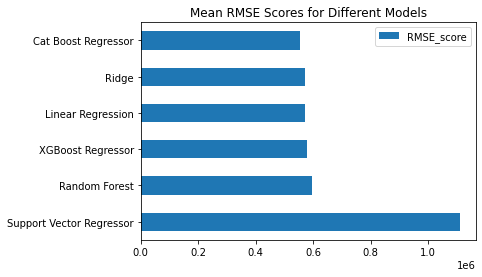

In [24]:
model_compare = pd.DataFrame(cv_scores, index = ['RMSE_score'])

# Transpose the DataFrame and sort it in ascending order based on RMSE_score
model_compare_sorted = model_compare.T.sort_values(by='RMSE_score', ascending=False)

model_compare_sorted.plot.barh()
plt.title('Mean RMSE Scores for Different Models');

> Catboost regressor model has the least rmse of 553812.69, followed by Ridge and Linear regression. The rmse score gotten after cross validation for the catboost model is lesser than the previous rmse score 0f 561,080.

In [25]:
# perform a hyperparameter tuning on some selected models
from sklearn.model_selection import GridSearchCV

# Selected models
catboost_model = CatBoostRegressor()
xgboost_model = XGBRegressor()
random_forest_model = RandomForestRegressor()

# Parameter grids for hyperparameter tuning
catboost_params = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [4, 6, 8],  # Depth of the trees
    # Add more hyperparameters specific to CatBoostRegressor
}

xgboost_params = {
    'n_estimators': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [4, 6, 8],  # Maximum depth of the trees
    # Add more hyperparameters specific to XGBRegressor
}

random_forest_params = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    # Add more hyperparameters specific to RandomForestRegressor
}

# Perform GridSearchCV for hyperparameter tuning
def perform_gridsearch(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    return best_model, best_params

# calling the perform_gridsearch function on the selected models
best_catboost_model, best_catboost_params = perform_gridsearch(catboost_model, catboost_params, X_train, y_train)
best_xgboost_model, best_xgboost_params = perform_gridsearch(xgboost_model, xgboost_params, X_train, y_train)
best_random_forest_model, best_random_forest_params = perform_gridsearch(random_forest_model, random_forest_params, X_train, y_train)

0:	learn: 1012787.2825356	total: 4.84ms	remaining: 963ms
1:	learn: 963027.6636253	total: 9.4ms	remaining: 931ms
2:	learn: 914286.1276097	total: 14.6ms	remaining: 956ms
3:	learn: 874155.2335775	total: 19.3ms	remaining: 944ms
4:	learn: 838206.9530842	total: 22.9ms	remaining: 892ms
5:	learn: 806276.1238827	total: 27.1ms	remaining: 877ms
6:	learn: 775519.5127121	total: 30.7ms	remaining: 847ms
7:	learn: 750001.4181042	total: 34.7ms	remaining: 833ms
8:	learn: 725877.0203238	total: 38.6ms	remaining: 819ms
9:	learn: 704870.7088187	total: 42.5ms	remaining: 807ms
10:	learn: 685956.0449853	total: 46.3ms	remaining: 796ms
11:	learn: 668587.4326258	total: 50.5ms	remaining: 792ms
12:	learn: 653266.9159121	total: 55.8ms	remaining: 802ms
13:	learn: 639418.9901836	total: 61.2ms	remaining: 813ms
14:	learn: 626690.2821223	total: 67ms	remaining: 826ms
15:	learn: 615455.8202669	total: 72.7ms	remaining: 836ms
16:	learn: 606107.2162703	total: 79ms	remaining: 851ms
17:	learn: 596968.3324460	total: 84.5ms	remai

172:	learn: 493460.2534787	total: 864ms	remaining: 135ms
173:	learn: 493346.4179458	total: 868ms	remaining: 130ms
174:	learn: 493287.7041504	total: 870ms	remaining: 124ms
175:	learn: 493231.2345383	total: 873ms	remaining: 119ms
176:	learn: 493149.0798026	total: 876ms	remaining: 114ms
177:	learn: 492971.9035886	total: 879ms	remaining: 109ms
178:	learn: 492901.9736569	total: 882ms	remaining: 103ms
179:	learn: 492725.0073508	total: 885ms	remaining: 98.4ms
180:	learn: 492617.9125597	total: 888ms	remaining: 93.2ms
181:	learn: 492570.4058767	total: 891ms	remaining: 88.1ms
182:	learn: 492550.2205702	total: 894ms	remaining: 83ms
183:	learn: 492397.0612562	total: 896ms	remaining: 78ms
184:	learn: 492238.7009525	total: 899ms	remaining: 72.9ms
185:	learn: 492003.0502998	total: 902ms	remaining: 67.9ms
186:	learn: 491866.8478940	total: 905ms	remaining: 62.9ms
187:	learn: 491720.0522450	total: 908ms	remaining: 58ms
188:	learn: 491654.6034533	total: 911ms	remaining: 53ms
189:	learn: 491555.8318685	to

In [26]:
from math import sqrt

# Best CatBoost model with the best hyperparameters
best_catboost_model = CatBoostRegressor(iterations=300, learning_rate=0.1, depth=6)

# Best XGBoost model with the best hyperparameters
best_xgboost_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=4)

# Best Decision Tree model with the best hyperparameters
best_random_forest_model = RandomForestRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=2)

# Train the models on the entire training data
best_catboost_model.fit(X_train, y_train)
best_xgboost_model.fit(X_train, y_train)
best_random_forest_model.fit(X_train, y_train)

# Make predictions on the test data using the trained models
catboost_predictions = best_catboost_model.predict(X_test)
xgboost_predictions = best_xgboost_model.predict(X_test)
random_forest_predictions = best_random_forest_model.predict(X_test)

# Calculate the RMSE scores on the test predictions
catboost_rmse = sqrt(mean_squared_error(y_test, catboost_predictions))
xgboost_rmse = sqrt(mean_squared_error(y_test, xgboost_predictions))
random_forest_rmse = sqrt(mean_squared_error(y_test, random_forest_predictions))

print(f"CatBoost RMSE: {catboost_rmse}")
print(f"XGBoost RMSE: {xgboost_rmse}")
print(f"Random Forest RMSE: {random_forest_rmse}")

0:	learn: 1005543.9827746	total: 33.1ms	remaining: 9.89s
1:	learn: 946523.8288894	total: 44.1ms	remaining: 6.56s
2:	learn: 897702.3920030	total: 49.9ms	remaining: 4.94s
3:	learn: 850380.0465058	total: 58.4ms	remaining: 4.32s
4:	learn: 811787.0376456	total: 64.5ms	remaining: 3.81s
5:	learn: 776595.3226487	total: 71.2ms	remaining: 3.49s
6:	learn: 745883.1178970	total: 75.9ms	remaining: 3.18s
7:	learn: 717178.7884944	total: 79.8ms	remaining: 2.91s
8:	learn: 692381.4884967	total: 84.5ms	remaining: 2.73s
9:	learn: 670396.6113518	total: 89.3ms	remaining: 2.59s
10:	learn: 651075.4810205	total: 93.4ms	remaining: 2.45s
11:	learn: 634288.2592647	total: 97ms	remaining: 2.33s
12:	learn: 619067.4800919	total: 102ms	remaining: 2.26s
13:	learn: 606746.0170042	total: 107ms	remaining: 2.18s
14:	learn: 595835.1189062	total: 111ms	remaining: 2.1s
15:	learn: 585193.8723301	total: 115ms	remaining: 2.04s
16:	learn: 576219.8533118	total: 120ms	remaining: 2s
17:	learn: 568451.2563220	total: 126ms	remaining: 1

174:	learn: 467896.6973950	total: 904ms	remaining: 646ms
175:	learn: 467703.9029691	total: 908ms	remaining: 640ms
176:	learn: 467399.9122090	total: 911ms	remaining: 633ms
177:	learn: 467200.3207202	total: 915ms	remaining: 627ms
178:	learn: 467135.8440252	total: 920ms	remaining: 622ms
179:	learn: 466966.4867606	total: 925ms	remaining: 616ms
180:	learn: 466899.0290533	total: 929ms	remaining: 611ms
181:	learn: 466658.9063642	total: 933ms	remaining: 605ms
182:	learn: 466603.5505008	total: 936ms	remaining: 598ms
183:	learn: 466543.2713998	total: 939ms	remaining: 592ms
184:	learn: 466470.7679656	total: 943ms	remaining: 586ms
185:	learn: 466415.9306016	total: 946ms	remaining: 580ms
186:	learn: 466049.8898443	total: 950ms	remaining: 574ms
187:	learn: 465709.0853444	total: 953ms	remaining: 568ms
188:	learn: 465494.6974127	total: 957ms	remaining: 562ms
189:	learn: 465336.0889884	total: 961ms	remaining: 556ms
190:	learn: 465097.2480188	total: 964ms	remaining: 550ms
191:	learn: 464695.4495218	tota

> Of the three selected models, Catboost regressor had the least rmse score of 557,634.58 followed by the XGBoost and then the random forest model. However, the Cross-validated catboost model has the least rmse score when comapred to the hyperparameter tuned catboost and plain catboost model. After careful considerations, the cross-validated catboost would be the chosen model for the prediction. 

In [27]:
# Create the CatBoostRegressor model with desired hyperparameters
catboost_model = CatBoostRegressor(iterations=300, learning_rate=0.1, depth=6)

# Set the number of folds for k-fold cross-validation
num_folds = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store the RMSE scores for each fold
rmse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features_df):
    X_train, X_test = features_df.iloc[train_index], features_df.iloc[test_index]
    y_train, y_test = target_df.iloc[train_index], target_df.iloc[test_index]

    # Fit the model on the training data
    catboost_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = catboost_model.predict(X_test)

    # Calculate RMSE for this fold
    fold_rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    rmse_scores.append(fold_rmse)

# Calculate the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Cross-Validation RMSE: (mean_rmse: {mean_rmse:.2f}, standard_deviation_rmse: {std_rmse:.2f})")

0:	learn: 1006969.3689161	total: 16.5ms	remaining: 4.94s
1:	learn: 947033.0132337	total: 32.9ms	remaining: 4.89s
2:	learn: 899614.0335537	total: 39.3ms	remaining: 3.89s
3:	learn: 852918.0047788	total: 46.1ms	remaining: 3.41s
4:	learn: 812925.5563204	total: 52.8ms	remaining: 3.12s
5:	learn: 776623.3164218	total: 58.1ms	remaining: 2.85s
6:	learn: 745037.0730750	total: 62.7ms	remaining: 2.62s
7:	learn: 717949.8946601	total: 67.9ms	remaining: 2.48s
8:	learn: 693378.3637917	total: 72.8ms	remaining: 2.35s
9:	learn: 670568.7404917	total: 77.9ms	remaining: 2.26s
10:	learn: 651084.1763283	total: 82.5ms	remaining: 2.17s
11:	learn: 634704.4341917	total: 87.6ms	remaining: 2.1s
12:	learn: 619387.9686435	total: 92.1ms	remaining: 2.03s
13:	learn: 606041.6997597	total: 96.7ms	remaining: 1.98s
14:	learn: 595227.1962690	total: 101ms	remaining: 1.93s
15:	learn: 584816.9862956	total: 108ms	remaining: 1.91s
16:	learn: 576655.6461409	total: 112ms	remaining: 1.87s
17:	learn: 568762.1192152	total: 118ms	remai

164:	learn: 472193.2312000	total: 898ms	remaining: 735ms
165:	learn: 472041.2187395	total: 905ms	remaining: 731ms
166:	learn: 471493.6225324	total: 911ms	remaining: 726ms
167:	learn: 471390.7639163	total: 917ms	remaining: 721ms
168:	learn: 471348.5028914	total: 923ms	remaining: 715ms
169:	learn: 471069.1177681	total: 928ms	remaining: 710ms
170:	learn: 470920.6948429	total: 934ms	remaining: 704ms
171:	learn: 470829.5556529	total: 939ms	remaining: 698ms
172:	learn: 470745.0294553	total: 944ms	remaining: 693ms
173:	learn: 470644.8811965	total: 949ms	remaining: 687ms
174:	learn: 470086.3818997	total: 954ms	remaining: 681ms
175:	learn: 469934.8954186	total: 958ms	remaining: 675ms
176:	learn: 469670.1953035	total: 963ms	remaining: 669ms
177:	learn: 469615.7374251	total: 967ms	remaining: 663ms
178:	learn: 469512.8811577	total: 972ms	remaining: 657ms
179:	learn: 469358.8038310	total: 976ms	remaining: 651ms
180:	learn: 469200.1921423	total: 981ms	remaining: 645ms
181:	learn: 468953.7984979	tota

35:	learn: 535406.3115492	total: 186ms	remaining: 1.36s
36:	learn: 534385.0687822	total: 191ms	remaining: 1.35s
37:	learn: 533642.4479703	total: 195ms	remaining: 1.35s
38:	learn: 532746.6841249	total: 200ms	remaining: 1.34s
39:	learn: 532269.5707975	total: 205ms	remaining: 1.33s
40:	learn: 531733.2932877	total: 210ms	remaining: 1.32s
41:	learn: 530097.5529187	total: 215ms	remaining: 1.32s
42:	learn: 529125.0190317	total: 219ms	remaining: 1.31s
43:	learn: 528567.1787105	total: 224ms	remaining: 1.3s
44:	learn: 528187.2156062	total: 230ms	remaining: 1.3s
45:	learn: 527428.3258764	total: 234ms	remaining: 1.29s
46:	learn: 527162.0466938	total: 240ms	remaining: 1.29s
47:	learn: 526757.5761317	total: 246ms	remaining: 1.29s
48:	learn: 526520.9833684	total: 250ms	remaining: 1.28s
49:	learn: 525935.6077140	total: 255ms	remaining: 1.27s
50:	learn: 525758.8542464	total: 259ms	remaining: 1.26s
51:	learn: 525457.0277601	total: 264ms	remaining: 1.26s
52:	learn: 523967.1332184	total: 270ms	remaining: 

205:	learn: 479458.8146703	total: 1.05s	remaining: 482ms
206:	learn: 479297.7919935	total: 1.06s	remaining: 476ms
207:	learn: 479116.4948762	total: 1.06s	remaining: 471ms
208:	learn: 478941.9434296	total: 1.07s	remaining: 466ms
209:	learn: 478695.1412716	total: 1.07s	remaining: 461ms
210:	learn: 478617.2969899	total: 1.08s	remaining: 456ms
211:	learn: 478537.5843142	total: 1.08s	remaining: 451ms
212:	learn: 478195.3613754	total: 1.09s	remaining: 445ms
213:	learn: 477904.3184122	total: 1.09s	remaining: 440ms
214:	learn: 477775.1721900	total: 1.1s	remaining: 435ms
215:	learn: 477661.4611341	total: 1.1s	remaining: 430ms
216:	learn: 477483.4150656	total: 1.11s	remaining: 424ms
217:	learn: 477268.0599255	total: 1.11s	remaining: 419ms
218:	learn: 477225.6122595	total: 1.12s	remaining: 414ms
219:	learn: 476834.9598885	total: 1.13s	remaining: 409ms
220:	learn: 476677.9041251	total: 1.13s	remaining: 404ms
221:	learn: 476574.0459823	total: 1.14s	remaining: 399ms
222:	learn: 476472.4500227	total:

68:	learn: 508014.3119005	total: 365ms	remaining: 1.22s
69:	learn: 507816.2035512	total: 370ms	remaining: 1.22s
70:	learn: 507442.2151893	total: 375ms	remaining: 1.21s
71:	learn: 506462.5291593	total: 379ms	remaining: 1.2s
72:	learn: 505653.4441846	total: 384ms	remaining: 1.19s
73:	learn: 505557.9717790	total: 388ms	remaining: 1.19s
74:	learn: 505426.5953651	total: 393ms	remaining: 1.18s
75:	learn: 505098.5040620	total: 397ms	remaining: 1.17s
76:	learn: 504905.3098720	total: 402ms	remaining: 1.16s
77:	learn: 504208.0905208	total: 407ms	remaining: 1.16s
78:	learn: 503970.2230701	total: 411ms	remaining: 1.15s
79:	learn: 503459.5793914	total: 416ms	remaining: 1.14s
80:	learn: 503372.9315992	total: 420ms	remaining: 1.14s
81:	learn: 503165.1254997	total: 424ms	remaining: 1.13s
82:	learn: 502759.8038365	total: 429ms	remaining: 1.12s
83:	learn: 502648.8515373	total: 434ms	remaining: 1.11s
84:	learn: 502007.8136796	total: 438ms	remaining: 1.11s
85:	learn: 501801.1496556	total: 443ms	remaining:

214:	learn: 463440.5162081	total: 1.06s	remaining: 420ms
215:	learn: 463170.9216947	total: 1.07s	remaining: 415ms
216:	learn: 463119.2859811	total: 1.07s	remaining: 410ms
217:	learn: 462942.2586314	total: 1.08s	remaining: 405ms
218:	learn: 462635.4400114	total: 1.08s	remaining: 400ms
219:	learn: 462263.7396829	total: 1.08s	remaining: 395ms
220:	learn: 462176.5798659	total: 1.09s	remaining: 390ms
221:	learn: 462015.3630848	total: 1.09s	remaining: 385ms
222:	learn: 461884.9342748	total: 1.1s	remaining: 380ms
223:	learn: 461518.0630188	total: 1.1s	remaining: 375ms
224:	learn: 461331.8581619	total: 1.11s	remaining: 370ms
225:	learn: 460691.5822220	total: 1.11s	remaining: 365ms
226:	learn: 460574.9049269	total: 1.12s	remaining: 360ms
227:	learn: 460473.5619371	total: 1.12s	remaining: 355ms
228:	learn: 460214.8254289	total: 1.13s	remaining: 350ms
229:	learn: 459812.4676154	total: 1.13s	remaining: 345ms
230:	learn: 459765.5256151	total: 1.14s	remaining: 340ms
231:	learn: 459704.5008311	total:

67:	learn: 520372.5173697	total: 375ms	remaining: 1.28s
68:	learn: 520085.9936682	total: 389ms	remaining: 1.3s
69:	learn: 519448.4067923	total: 406ms	remaining: 1.33s
70:	learn: 518723.9803740	total: 417ms	remaining: 1.34s
71:	learn: 518262.0220338	total: 430ms	remaining: 1.36s
72:	learn: 518033.5346927	total: 441ms	remaining: 1.37s
73:	learn: 517604.8980863	total: 453ms	remaining: 1.38s
74:	learn: 517454.1578454	total: 466ms	remaining: 1.4s
75:	learn: 517294.2613022	total: 475ms	remaining: 1.4s
76:	learn: 516897.0214073	total: 508ms	remaining: 1.47s
77:	learn: 516765.1391042	total: 527ms	remaining: 1.5s
78:	learn: 516439.1561554	total: 537ms	remaining: 1.5s
79:	learn: 516031.3068130	total: 579ms	remaining: 1.59s
80:	learn: 515241.4139515	total: 598ms	remaining: 1.62s
81:	learn: 514912.1432711	total: 605ms	remaining: 1.61s
82:	learn: 514555.5272934	total: 613ms	remaining: 1.6s
83:	learn: 514332.8414496	total: 620ms	remaining: 1.59s
84:	learn: 514215.4988060	total: 629ms	remaining: 1.59

230:	learn: 474432.5641387	total: 1.46s	remaining: 437ms
231:	learn: 474389.9298826	total: 1.47s	remaining: 430ms
232:	learn: 474266.3562221	total: 1.47s	remaining: 423ms
233:	learn: 474132.8713984	total: 1.48s	remaining: 416ms
234:	learn: 474017.9653886	total: 1.48s	remaining: 410ms
235:	learn: 473831.5778923	total: 1.49s	remaining: 403ms
236:	learn: 473619.6425494	total: 1.49s	remaining: 396ms
237:	learn: 473559.3250690	total: 1.49s	remaining: 389ms
238:	learn: 473362.8747164	total: 1.5s	remaining: 383ms
239:	learn: 473297.3548737	total: 1.5s	remaining: 376ms
240:	learn: 473177.0062584	total: 1.51s	remaining: 369ms
241:	learn: 472873.5587677	total: 1.51s	remaining: 363ms
242:	learn: 472760.3608693	total: 1.52s	remaining: 356ms
243:	learn: 472590.1924305	total: 1.52s	remaining: 349ms
244:	learn: 472306.2994874	total: 1.53s	remaining: 343ms
245:	learn: 472276.7977172	total: 1.53s	remaining: 336ms
246:	learn: 472176.2844660	total: 1.54s	remaining: 330ms
247:	learn: 472021.9281725	total:

102:	learn: 496352.6316061	total: 530ms	remaining: 1.01s
103:	learn: 496235.4714277	total: 535ms	remaining: 1.01s
104:	learn: 495989.3029437	total: 539ms	remaining: 1s
105:	learn: 495874.3001455	total: 544ms	remaining: 995ms
106:	learn: 495509.0913783	total: 549ms	remaining: 989ms
107:	learn: 495377.9941046	total: 564ms	remaining: 1s
108:	learn: 494717.1859936	total: 571ms	remaining: 1s
109:	learn: 494344.0820678	total: 576ms	remaining: 995ms
110:	learn: 494113.3091466	total: 581ms	remaining: 989ms
111:	learn: 493937.6437463	total: 585ms	remaining: 983ms
112:	learn: 493604.9641247	total: 590ms	remaining: 976ms
113:	learn: 493494.2264212	total: 595ms	remaining: 970ms
114:	learn: 493115.1304378	total: 599ms	remaining: 964ms
115:	learn: 492777.3073893	total: 604ms	remaining: 957ms
116:	learn: 492655.3215825	total: 608ms	remaining: 951ms
117:	learn: 492392.0981432	total: 613ms	remaining: 945ms
118:	learn: 492162.0200297	total: 618ms	remaining: 939ms
119:	learn: 491825.2230870	total: 622ms	

279:	learn: 458308.3894049	total: 1.41s	remaining: 101ms
280:	learn: 458243.0119591	total: 1.42s	remaining: 95.7ms
281:	learn: 458093.9870895	total: 1.42s	remaining: 90.8ms
282:	learn: 458013.0543546	total: 1.43s	remaining: 85.8ms
283:	learn: 457949.0857228	total: 1.43s	remaining: 80.7ms
284:	learn: 457847.8293969	total: 1.44s	remaining: 75.6ms
285:	learn: 457800.6588836	total: 1.44s	remaining: 70.6ms
286:	learn: 457696.5397058	total: 1.45s	remaining: 65.5ms
287:	learn: 457314.4012565	total: 1.45s	remaining: 60.4ms
288:	learn: 457070.3804628	total: 1.45s	remaining: 55.4ms
289:	learn: 456948.4671382	total: 1.46s	remaining: 50.3ms
290:	learn: 456875.4395430	total: 1.46s	remaining: 45.3ms
291:	learn: 456699.7800066	total: 1.47s	remaining: 40.2ms
292:	learn: 456443.9258900	total: 1.47s	remaining: 35.2ms
293:	learn: 456374.9566048	total: 1.48s	remaining: 30.1ms
294:	learn: 456226.9664247	total: 1.48s	remaining: 25.1ms
295:	learn: 456130.9377969	total: 1.49s	remaining: 20.1ms
296:	learn: 455

In [28]:
# write a function to get the feature importance
def get_feature_importance (model, X_train, y_train):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = pd.Series(model.feature_importances_, index = X_train.columns)

    return feature_importances

In [29]:
# Check feature importance using the Validated Catboost model
feature_importances = get_feature_importance (catboost_model, X_train, y_train)

print("Feature Importance during Model Evaluation:")
print(feature_importances)

0:	learn: 1009004.9052373	total: 16ms	remaining: 4.77s
1:	learn: 949755.0615233	total: 27.1ms	remaining: 4.04s
2:	learn: 901817.5473978	total: 38.1ms	remaining: 3.77s
3:	learn: 856189.0668507	total: 47.3ms	remaining: 3.5s
4:	learn: 817789.5818819	total: 54.9ms	remaining: 3.24s
5:	learn: 781117.5694944	total: 60ms	remaining: 2.94s
6:	learn: 749695.2169154	total: 65.2ms	remaining: 2.73s
7:	learn: 724679.7369026	total: 70.3ms	remaining: 2.56s
8:	learn: 699914.2299948	total: 74.8ms	remaining: 2.42s
9:	learn: 678381.7638878	total: 79.3ms	remaining: 2.3s
10:	learn: 659390.5626564	total: 83.8ms	remaining: 2.2s
11:	learn: 642724.5415744	total: 88.6ms	remaining: 2.13s
12:	learn: 627413.8099768	total: 93ms	remaining: 2.05s
13:	learn: 615793.9321739	total: 97.4ms	remaining: 1.99s
14:	learn: 604897.3291150	total: 102ms	remaining: 1.94s
15:	learn: 594309.0589606	total: 107ms	remaining: 1.89s
16:	learn: 585763.2850780	total: 111ms	remaining: 1.85s
17:	learn: 577795.8403655	total: 116ms	remaining: 1.

170:	learn: 479491.3218794	total: 895ms	remaining: 675ms
171:	learn: 479354.3807683	total: 900ms	remaining: 670ms
172:	learn: 479003.7877218	total: 904ms	remaining: 664ms
173:	learn: 478892.2892601	total: 909ms	remaining: 658ms
174:	learn: 478626.5367904	total: 914ms	remaining: 653ms
175:	learn: 478335.5210383	total: 918ms	remaining: 647ms
176:	learn: 478162.0026954	total: 923ms	remaining: 641ms
177:	learn: 478050.8684708	total: 928ms	remaining: 636ms
178:	learn: 477895.1132530	total: 932ms	remaining: 630ms
179:	learn: 477679.6793162	total: 937ms	remaining: 624ms
180:	learn: 477398.5332544	total: 941ms	remaining: 619ms
181:	learn: 477279.9862897	total: 946ms	remaining: 613ms
182:	learn: 477134.4575046	total: 950ms	remaining: 608ms
183:	learn: 476744.1595323	total: 955ms	remaining: 602ms
184:	learn: 476602.5224008	total: 959ms	remaining: 596ms
185:	learn: 476245.3270351	total: 964ms	remaining: 591ms
186:	learn: 475975.6673400	total: 968ms	remaining: 585ms
187:	learn: 475819.1319085	tota

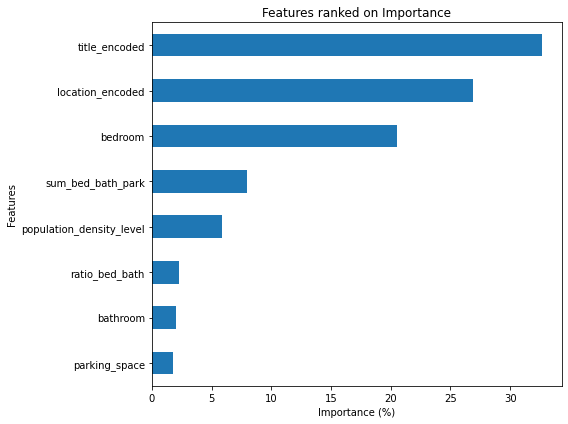

In [30]:
# convert the feature_importances to a pandas series
importances = pd.Series(feature_importances)
# Plot the feature importances as a bar chart
plt.figure(figsize=(8, 6))
importances.sort_values(ascending= True).plot(kind='barh')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Features ranked on Importance')
plt.tight_layout()
plt.show()

### Make predictions on the test dataset using the validated catboost model

In [31]:
# Set the display format for float values
pd.options.display.float_format = '{:.2f}'.format

X_test = test.drop(['ID'], axis=1)

# Use the trained model to predict prices for the test dataset
y_pred = catboost_model.predict(X_test)

y_pred_series = pd.Series(y_pred, name='price', dtype=float)

# Create the predictions DataFrame
predictions_df = pd.DataFrame({'ID': test['ID'], 'price': y_pred_series})

# Display the predictions DataFrame
print(predictions_df)

         ID      price
0       845 2367847.10
1      1924 1069545.22
2     10718 1252199.71
3     12076 8927024.10
4     12254 1936921.24
...     ...        ...
5995   1594 2089922.70
5996   2416 2008829.80
5997  10195 1970224.42
5998   9455 1657186.02
5999  11736 3390317.25

[6000 rows x 2 columns]


In [32]:
# save the predictions to a csv
predictions_df.to_csv('Wazobia_Predictions.csv', index=False)